In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\pattn\Downloads\Train.csv')

In [2]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Identifying the missing values (Outliers)

In [4]:
missing_data = df.isnull().sum()
print('Missing values per column:')
print(missing_data)


Missing values per column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


#### Checking on outliers and method to handle the it

##### 1 . Using median of the whole column

In [5]:
overall_median_weight = df['Item_Weight'].median()
print(overall_median_weight)

12.6


##### 2 . Using the median of different categorical values

In [6]:
import pandas as pd
import numpy as np
median_weights = df.groupby('Item_Type')['Item_Weight'].transform('median')
df['Item_Weight'].fillna(median_weights, inplace=True)
median_by_category = df.groupby('Item_Type')['Item_Weight'].median().reset_index()
median_by_category.columns = ['Item_Type', 'Median_Item_Weight']
print(median_by_category)


                Item_Type  Median_Item_Weight
0            Baking Goods              11.650
1                  Breads              10.600
2               Breakfast              10.695
3                  Canned              12.150
4                   Dairy              13.350
5            Frozen Foods              12.850
6   Fruits and Vegetables              13.100
7             Hard Drinks              10.100
8      Health and Hygiene              12.150
9               Household              13.150
10                   Meat              12.350
11                 Others              14.500
12                Seafood              11.650
13            Snack Foods              13.150
14            Soft Drinks              11.800
15          Starchy Foods              13.175


In [7]:
median_weights = df.groupby('Item_Type')['Item_Weight'].transform('median')
df['Item_Weight'].fillna(median_weights, inplace=True)
print(df['Item_Weight'])


0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


In [8]:
mode_values = df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode().iloc[0])
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Type'].map(mode_values))
print(df['Outlet_Size'])
print("\nUpdated DataFrame with filled Outlet_Size:")
print(df)

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

Updated DataFrame with filled Outlet_Size:
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210 

#### Standardizing the values in 'Item_Fat_Content' column

In [9]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [10]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'})
unique_values = df['Item_Fat_Content'].unique()
print("Unique values in 'Item_Fat_Content':", unique_values)



Unique values in 'Item_Fat_Content': ['Low Fat' 'Regular']


### EDA through visualization of data

#### 1 . Distribution of sales using barplot

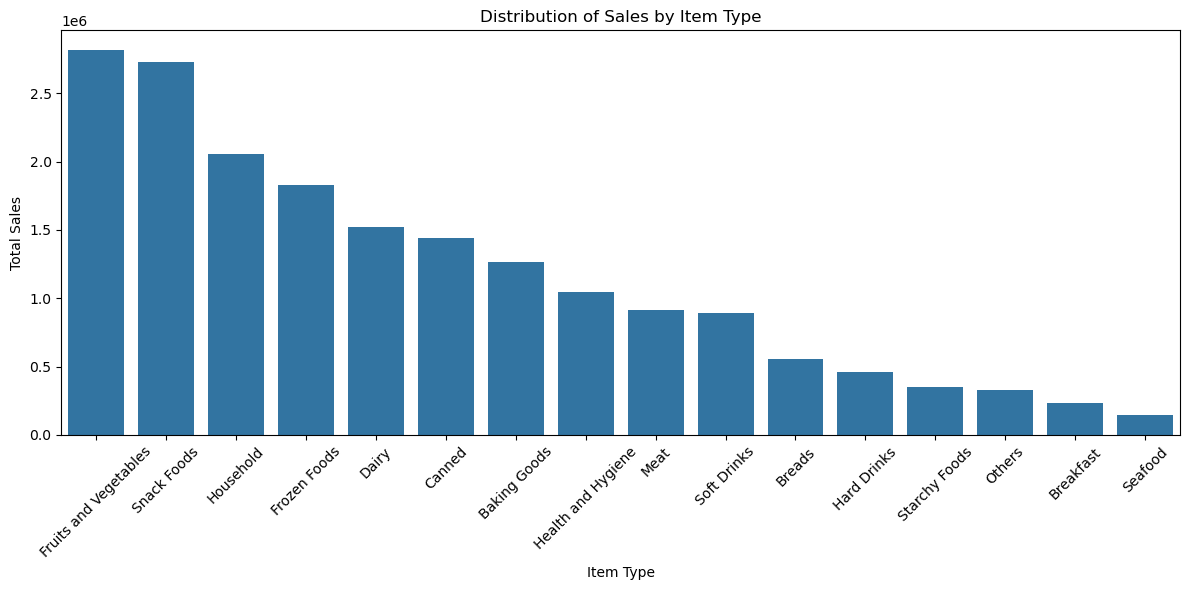

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sales_by_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()
sales_by_type = sales_by_type.sort_values(by='Item_Outlet_Sales', ascending=False)
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sales_by_type)
plt.xticks(rotation=45)  
plt.xlabel('Item Type')          
plt.ylabel('Total Sales')       
plt.title('Distribution of Sales by Item Type')
plt.tight_layout()
plt.show()

##### Observations :

##### Sales are highest for Fruits and Vegetables, followed by Snack Foods and Household items.
##### Sales decrease as we move down the list of item types.
##### The chart shows a clear downward trend in sales as we move from Fruits and Vegetables to Seafood.
##### The top 5 categories (Fruits and Vegetables, Snack Foods, Household, Frozen Foods, and Dairy) account for a significant portion of the total sales.

#### 2 . Sales Performance by Outlet Establishment Year using lineplot

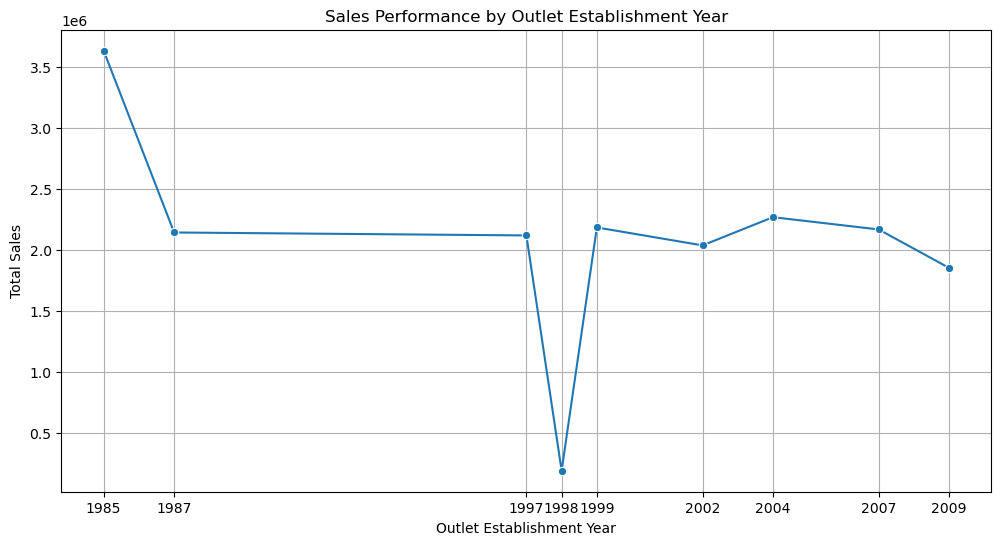

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
current_year = datetime.now().year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=sales_by_year, marker='o')
plt.xlabel('Outlet Establishment Year')      
plt.ylabel('Total Sales')             
plt.title('Sales Performance by Outlet Establishment Year')
plt.xticks(sales_by_year['Outlet_Establishment_Year'])  
plt.grid()
plt.show()

##### Observations :
##### Sales are highest in 1985, followed by 1999 and 2004.
##### Sales decrease significantly between 1997 and 1998.
##### Sales show a slight upward trend from 2002 to 2004.
##### Sales decline again from 2004 to 2009.
##### The chart shows a significant drop in sales between 1997 and 1998, followed by a period of recovery and then another decline.
##### The overall trend is downward, indicating a potential decline in the outlet's performance over time.

#### 3 . Sales Distribution Across Outlet Types using boxplot

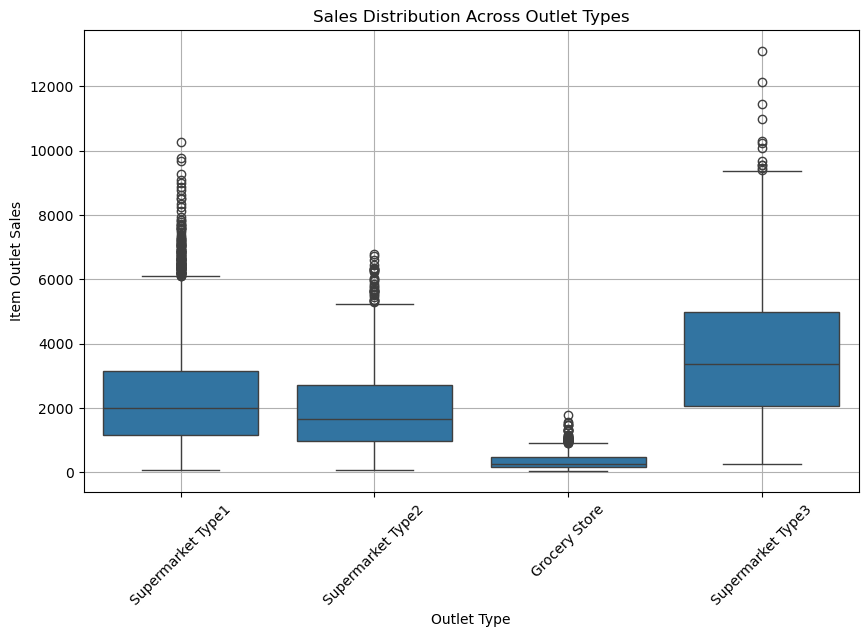

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel('Outlet Type')  # Set x-axis label
plt.ylabel('Item Outlet Sales')  # Set y-axis label
plt.title('Sales Distribution Across Outlet Types')  # Set plot title
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### 0bservations :
##### Sales vary significantly across different outlet types.
##### Supermarket Type1 and Supermarket Type3 generally have higher sales compared to Grocery Store and Supermarket Type2.
##### There is a wide range of sales within each outlet type.
##### The box plots show a significant overlap in sales between Supermarket Type1 and Supermarket Type2.
##### The box plots for Supermarket Type1 and Supermarket Type3 are similar in shape, indicating a similar distribution of sales.

#### 4 . Effect of Outlet Size on Sales using barplot

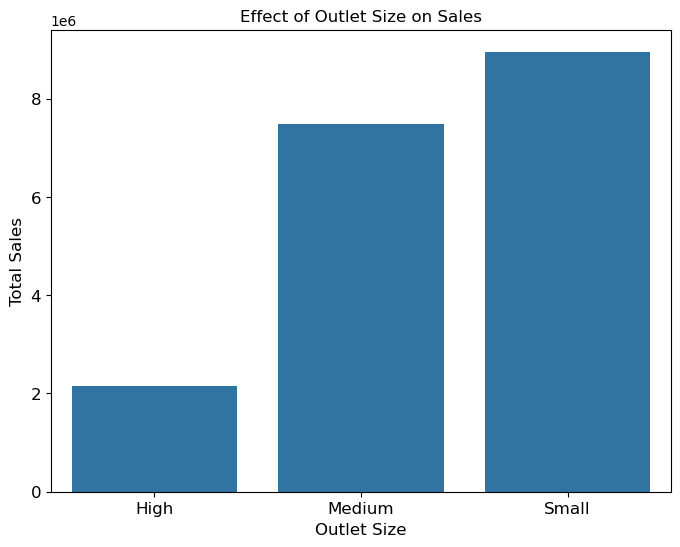

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sales_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=sales_by_size)  
plt.xlabel('Outlet Size', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Effect of Outlet Size on Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##### Observations :
##### Sales are highest for Small outlets, followed by Medium outlets, and then High outlets.
##### There is a clear upward trend in sales as outlet size decreases.
##### The chart shows a clear inverse relationship between outlet size and sales.
##### The difference in sales between Small and High outlets is significant.

#### 5 . Relationship Between Item MRP and Sales using scatterplot

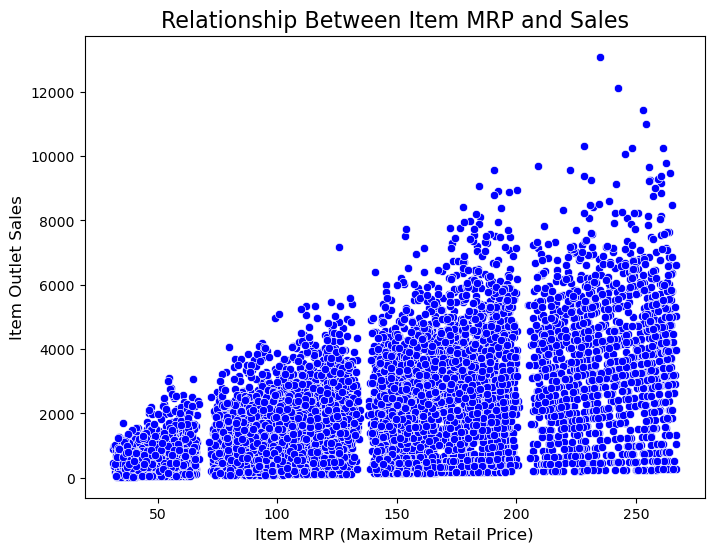

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, color='blue')
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP (Maximum Retail Price)', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()


##### Observations : 
##### There is a positive correlation between Item MRP (Maximum Retail Price) and Item Outlet Sales. This means that as the price of an item increases, its sales also tend to increase.
##### The data points are clustered in vertical bands: This suggests that there are specific price points where items are most commonly sold.
##### The density of points increases as the price increases: This indicates that there are more items with higher prices compared to lower prices.
##### There are some outliers with high sales at lower prices: These might be products with high demand or promotional discounts.
##### The overall trend is upward, but there is some variation: This suggests that price is not the only factor influencing sales. Other factors like brand, product category, and marketing efforts also play a role.

#### 6 . Distribution of Numerical Features using histogram

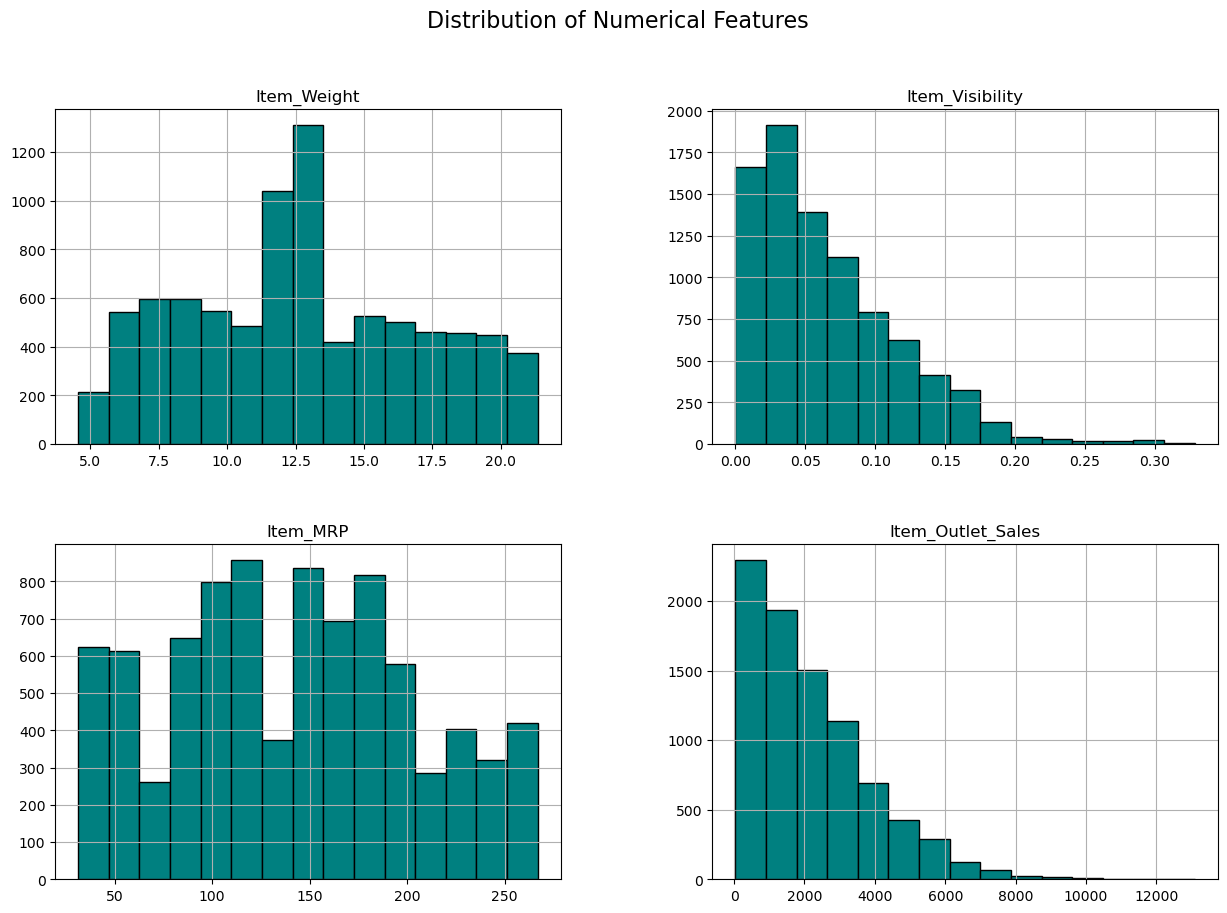

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Visualizing the distribution of numerical features

numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Plot histograms for numerical columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

#### 7 . Correlation between numerical columns

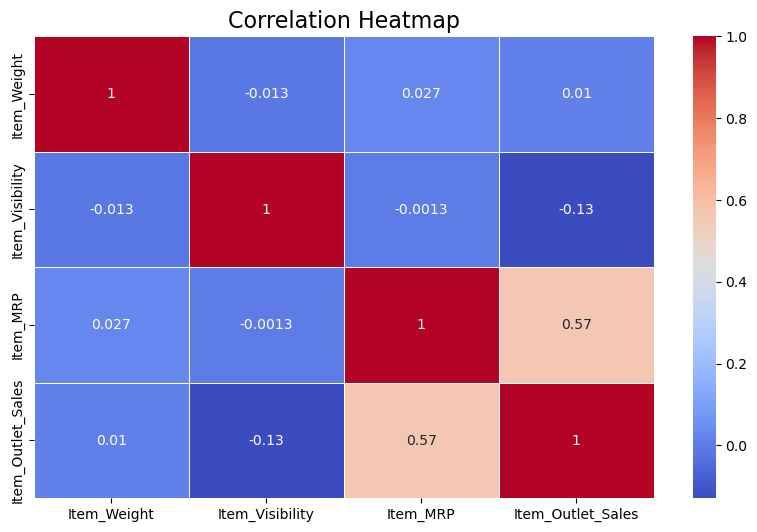

In [17]:
# 2. Checking Correlations between numerical features using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
    

##### Observations : 
##### There is a moderate positive correlation between Item_MRP and Item_Outlet_Sales: This means that as the price of an item increases, its sales also tend to increase.
##### There is a weak negative correlation between Item_Visibility and Item_Outlet_Sales: This means that as the visibility of an item increases, its sales tend to decrease slightly.
##### The other correlations are very weak or negligible.
##### Item_MRP and Item_Outlet_Sales: The moderate positive correlation suggests that higher-priced items tend to have higher sales. However, this relationship is not very strong, indicating that other factors are also influencing sales.
##### Item_Visibility and Item_Outlet_Sales: The weak negative correlation suggests that items with higher visibility might not necessarily have higher sales. This could be due to various reasons, such as product quality, brand reputation, or promotional activities.